<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Models_EVALS_50/Cancer_50_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
y
y





y

  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [2]:
!pip install tensorflow==2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 132 kB 55.5 MB/s 
     |████████████████████████████████| 462 kB 39.7 MB/s 
     |████████████████████████████████| 1.2 MB 37.9 MB/s 
     |████████████████████████████████| 14.8 MB 544 kB/s 
     |████████████████████████████████| 4.0 MB 14.2 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68723 sha256=4cc43a6f6406a1538997aa2ebd88731cc28b1eff459b173e9157926644be430e
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existing installation: nu

In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,Sequential

In [4]:
df = pd.read_csv("/content/cancer.csv")
df_new = df.drop(['id','Unnamed: 32'],axis =1)
df_new['diagnosis'] = LabelEncoder().fit_transform(df_new['diagnosis'])
y = df_new['diagnosis']

In [5]:
Scaler = StandardScaler()

In [6]:
rank1 = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "Chi_2").set_index('Attributes_Names')
df_chi = df_new[rank1[:15].index]

In [7]:
X_col =  df_chi
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


CHI Square

Random Forest

In [8]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.956140350877193

SVM

In [9]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9649122807017544

ANN

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                240       
_________________________________________________________________
batch_normalization (BatchNo (None, 15)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 24)                9

In [12]:
h = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
15/15 [==============================] - 2s 22ms/step - loss: 0.6773 - accuracy: 0.6198 - val_loss: 0.6368 - val_accuracy: 0.7632
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.7165 - val_loss: 0.6013 - val_accuracy: 0.8421
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5788 - accuracy: 0.6989 - val_loss: 0.5622 - val_accuracy: 0.8246
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5239 - accuracy: 0.7407 - val_loss: 0.5249 - val_accuracy: 0.8509
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.7802 - val_loss: 0.4782 - val_accuracy: 0.8596
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4473 - accuracy: 0.7868 - val_loss: 0.4359 - val_accuracy: 0.8684
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4201 - accuracy: 0.8154 - val_loss: 0.3937 - val_accuracy: 0.8947
Epoch 8/100


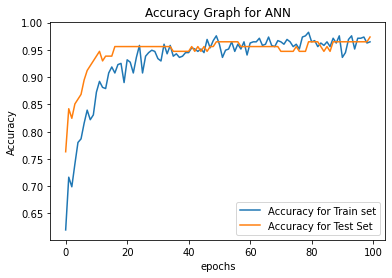

In [13]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

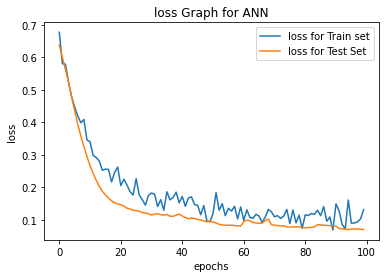

In [14]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [15]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9736842105263158

Tree Based Method

In [16]:
rank2  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "Tree_based_method").set_index('Attributes_Names')
df_tree = df_new[rank2[0:15].index]
X_col =  df_tree
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


Random Forest

In [17]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.956140350877193

SVM

In [18]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9736842105263158

ANN

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 15)                240       
_________________________________________________________________
batch_normalization_3 (Batch (None, 15)                60        
_________________________________________________________________
dense_6 (Dense)              (None, 20)                320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 20)                80        
_________________________________________________________________
dense_7 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 24)               

In [21]:
h = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
15/15 [==============================] - 2s 19ms/step - loss: 0.7152 - accuracy: 0.6088 - val_loss: 0.6573 - val_accuracy: 0.8421
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6127 - accuracy: 0.6923 - val_loss: 0.6101 - val_accuracy: 0.8860
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5281 - accuracy: 0.7736 - val_loss: 0.5531 - val_accuracy: 0.9035
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4382 - accuracy: 0.8198 - val_loss: 0.4923 - val_accuracy: 0.9035
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4362 - accuracy: 0.8132 - val_loss: 0.4287 - val_accuracy: 0.9035
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3775 - accuracy: 0.8593 - val_loss: 0.3640 - val_accuracy: 0.9035
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3150 - accuracy: 0.8857 - val_loss: 0.3078 - val_accuracy: 0.9211
Epoch 8/100


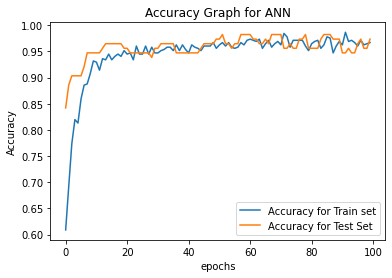

In [22]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

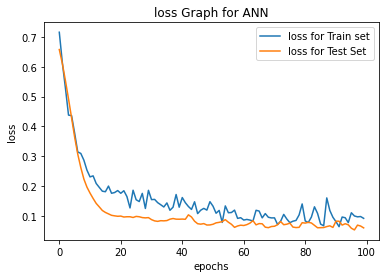

In [23]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [24]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9736842105263158

Permutation Method Mean

In [25]:
rank3  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "permutation_method_mean").set_index('Attributes_Names')
df_per_mean = df_new[rank3[0:15].index]
X_col =  df_per_mean
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


Random Forest 

In [26]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9385964912280702

SVM

In [27]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9736842105263158

ANN

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 15)                240       
_________________________________________________________________
batch_normalization_6 (Batch (None, 15)                60        
_________________________________________________________________
dense_11 (Dense)             (None, 20)                320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 20)                80        
_________________________________________________________________
dense_12 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 24)               

In [29]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 2s 20ms/step - loss: 0.7711 - accuracy: 0.5802 - val_loss: 0.6481 - val_accuracy: 0.7368
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6467 - accuracy: 0.6835 - val_loss: 0.6098 - val_accuracy: 0.8070
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 0.6128 - accuracy: 0.6725 - val_loss: 0.5775 - val_accuracy: 0.7807
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5528 - accuracy: 0.7341 - val_loss: 0.5401 - val_accuracy: 0.8158
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5241 - accuracy: 0.7495 - val_loss: 0.4972 - val_accuracy: 0.8333
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4492 - accuracy: 0.7868 - val_loss: 0.4516 - val_accuracy: 0.8596
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4144 - accuracy: 0.8132 - val_loss: 0.4108 - val_accuracy: 0.8684
Epoch 8/50
15/15 [=

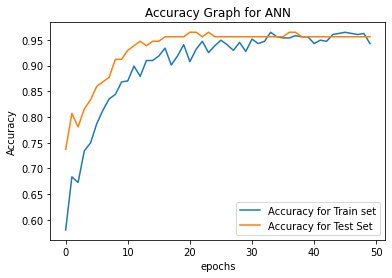

In [30]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

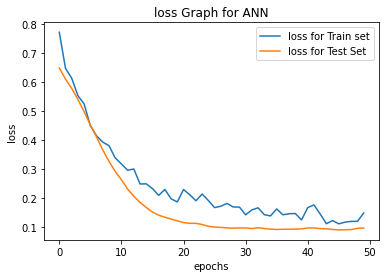

In [31]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [32]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.956140350877193

In [33]:
rank4  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "permutation_method_std").set_index('Attributes_Names')
df_per_std  = df_new[rank4[0:15].index]
X_col =  df_per_std
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


In [34]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.956140350877193

In [35]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9736842105263158

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 15)                240       
_________________________________________________________________
batch_normalization_9 (Batch (None, 15)                60        
_________________________________________________________________
dense_16 (Dense)             (None, 20)                320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 20)                80        
_________________________________________________________________
dense_17 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_6 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 24)               

In [37]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 3s 37ms/step - loss: 0.8410 - accuracy: 0.5275 - val_loss: 0.6915 - val_accuracy: 0.5877
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.7235 - accuracy: 0.6044 - val_loss: 0.6664 - val_accuracy: 0.6228
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.6676 - accuracy: 0.6484 - val_loss: 0.6459 - val_accuracy: 0.7105
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.6424 - accuracy: 0.6747 - val_loss: 0.6182 - val_accuracy: 0.7456
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 0.6245 - accuracy: 0.6857 - val_loss: 0.5870 - val_accuracy: 0.7456
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.5340 - accuracy: 0.7187 - val_loss: 0.5541 - val_accuracy: 0.7719
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5665 - accuracy: 0.7231 - val_loss: 0.5220 - val_accuracy: 0.7982
Epoch 8/50
15/15 [

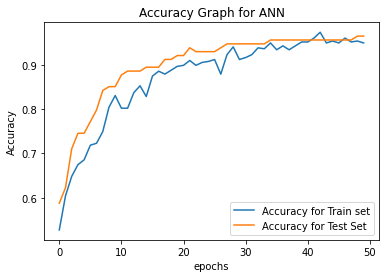

In [38]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

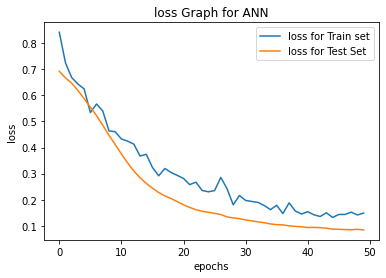

In [39]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [40]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9649122807017544

In [49]:
rank5  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "PCA").set_index('Attributes_Names')
df_pca  = df_new[rank5[:15].index]
X_col =  df_pca
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


In [50]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9649122807017544

In [51]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9649122807017544

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 15)                240       
_________________________________________________________________
batch_normalization_18 (Batc (None, 15)                60        
_________________________________________________________________
dense_31 (Dense)             (None, 20)                320       
_________________________________________________________________
batch_normalization_19 (Batc (None, 20)                80        
_________________________________________________________________
dense_32 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_12 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 24)               

In [53]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 2s 19ms/step - loss: 0.8687 - accuracy: 0.5538 - val_loss: 0.6623 - val_accuracy: 0.6404
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.7054 - accuracy: 0.6264 - val_loss: 0.6168 - val_accuracy: 0.7544
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6459 - accuracy: 0.6615 - val_loss: 0.5648 - val_accuracy: 0.7895
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5299 - accuracy: 0.7407 - val_loss: 0.5099 - val_accuracy: 0.8158
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4619 - accuracy: 0.7956 - val_loss: 0.4620 - val_accuracy: 0.8333
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4346 - accuracy: 0.8066 - val_loss: 0.4191 - val_accuracy: 0.8333
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4325 - accuracy: 0.8308 - val_loss: 0.3806 - val_accuracy: 0.8333
Epoch 8/50
15/15 [=

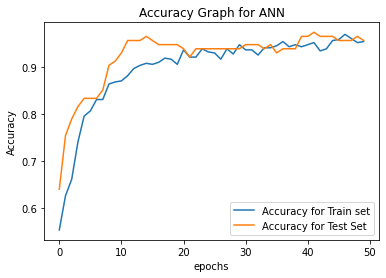

In [54]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

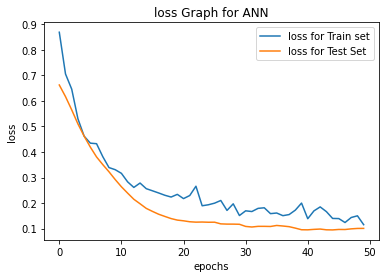

In [55]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [56]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.956140350877193

In [57]:
rank6  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "F_test").set_index('Attributes_Names')
df_f_test  = df_new[rank6[:15].index]
X_col =  df_f_test
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


In [58]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9473684210526315

In [59]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9385964912280702

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 15)                240       
_________________________________________________________________
batch_normalization_21 (Batc (None, 15)                60        
_________________________________________________________________
dense_36 (Dense)             (None, 20)                320       
_________________________________________________________________
batch_normalization_22 (Batc (None, 20)                80        
_________________________________________________________________
dense_37 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_14 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 24)               

In [61]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 3s 34ms/step - loss: 0.8808 - accuracy: 0.4791 - val_loss: 0.6692 - val_accuracy: 0.5526
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6636 - accuracy: 0.5780 - val_loss: 0.6148 - val_accuracy: 0.8246
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.6267 - accuracy: 0.6220 - val_loss: 0.5745 - val_accuracy: 0.8596
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5368 - accuracy: 0.7121 - val_loss: 0.5323 - val_accuracy: 0.8772
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5165 - accuracy: 0.7473 - val_loss: 0.4954 - val_accuracy: 0.9035
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4681 - accuracy: 0.8000 - val_loss: 0.4610 - val_accuracy: 0.9123
Epoch 7/50
15/15 [==============================] - 0s 12ms/step - loss: 0.4543 - accuracy: 0.8088 - val_loss: 0.4231 - val_accuracy: 0.9123
Epoch 8/50
15/15 

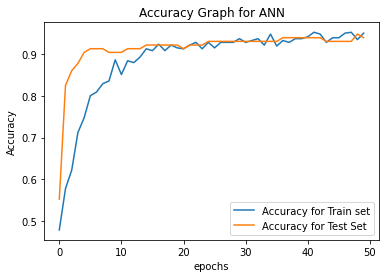

In [62]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

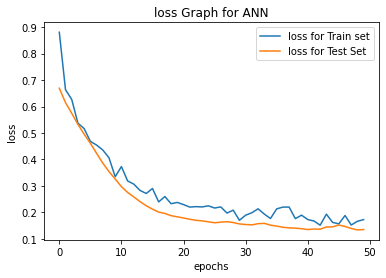

In [63]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [64]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9385964912280702

In [66]:
rank7  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "mutual_info").set_index('Attributes_Names')
df_mutual = df_new[rank7[:15].index]
X_col =  df_mutual
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


In [67]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9473684210526315

In [68]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9385964912280702

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 15)                240       
_________________________________________________________________
batch_normalization_24 (Batc (None, 15)                60        
_________________________________________________________________
dense_41 (Dense)             (None, 20)                320       
_________________________________________________________________
batch_normalization_25 (Batc (None, 20)                80        
_________________________________________________________________
dense_42 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_16 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 24)               

In [70]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 3s 37ms/step - loss: 0.8237 - accuracy: 0.4923 - val_loss: 0.6826 - val_accuracy: 0.6316
Epoch 2/50
15/15 [==============================] - 0s 10ms/step - loss: 0.7081 - accuracy: 0.6132 - val_loss: 0.6367 - val_accuracy: 0.8070
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.5798 - accuracy: 0.6813 - val_loss: 0.5987 - val_accuracy: 0.8333
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.5838 - accuracy: 0.7033 - val_loss: 0.5580 - val_accuracy: 0.8596
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5112 - accuracy: 0.7670 - val_loss: 0.5124 - val_accuracy: 0.8509
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.4573 - accuracy: 0.7890 - val_loss: 0.4644 - val_accuracy: 0.8596
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4411 - accuracy: 0.8264 - val_loss: 0.4181 - val_accuracy: 0.8596
Epoch 8/50
15/1

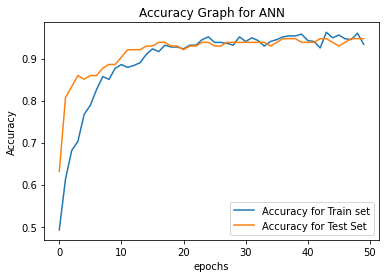

In [71]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

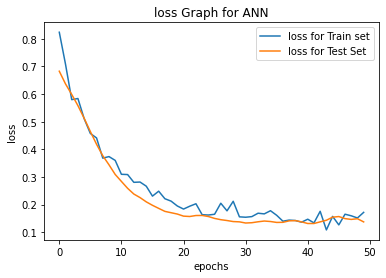

In [72]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [73]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9473684210526315

In [76]:
rank8  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "Pearson_Correlation").set_index('Attributes_Names')
df_pearson =  df_new[rank8[:15].index]
X_col =  df_pearson
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


In [77]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9385964912280702

In [78]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9385964912280702

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 15)                240       
_________________________________________________________________
batch_normalization_27 (Batc (None, 15)                60        
_________________________________________________________________
dense_46 (Dense)             (None, 20)                320       
_________________________________________________________________
batch_normalization_28 (Batc (None, 20)                80        
_________________________________________________________________
dense_47 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_18 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 24)               

In [80]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 3s 37ms/step - loss: 0.7163 - accuracy: 0.5846 - val_loss: 0.6089 - val_accuracy: 0.6842
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.6190 - accuracy: 0.6747 - val_loss: 0.5760 - val_accuracy: 0.7105
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5582 - accuracy: 0.7099 - val_loss: 0.5456 - val_accuracy: 0.7544
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4653 - accuracy: 0.7758 - val_loss: 0.5074 - val_accuracy: 0.8246
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4392 - accuracy: 0.8044 - val_loss: 0.4656 - val_accuracy: 0.8596
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.4038 - accuracy: 0.8330 - val_loss: 0.4216 - val_accuracy: 0.8947
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.3624 - accuracy: 0.8462 - val_loss: 0.3805 - val_accuracy: 0.9035
Epoch 8/50
15/15 [

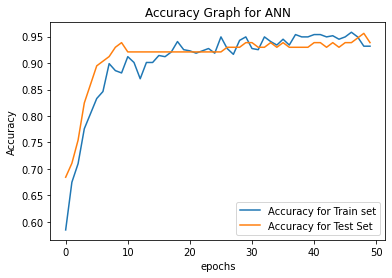

In [81]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

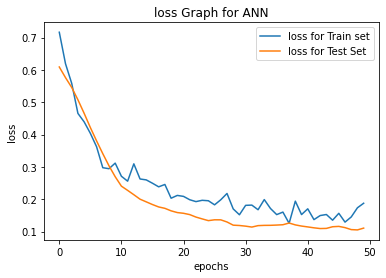

In [82]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [83]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9385964912280702

OWA

In [85]:
OWA =  rank8  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "OWA_method").set_index('Attributes_Name')

In [91]:
df_owa  = df_new[OWA[:15].index]

In [92]:
X_col =  df_owa
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


In [93]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
pred =  rf.predict(X_test)
accuracy_score(y_test,pred)

0.9473684210526315

In [94]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred =  svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9649122807017544

In [95]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 15)                240       
_________________________________________________________________
batch_normalization_30 (Batc (None, 15)                60        
_________________________________________________________________
dense_51 (Dense)             (None, 20)                320       
_________________________________________________________________
batch_normalization_31 (Batc (None, 20)                80        
_________________________________________________________________
dense_52 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_20 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 24)              

In [96]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 3s 36ms/step - loss: 0.8272 - accuracy: 0.5802 - val_loss: 0.6747 - val_accuracy: 0.6404
Epoch 2/50
15/15 [==============================] - 0s 10ms/step - loss: 0.6407 - accuracy: 0.6637 - val_loss: 0.6421 - val_accuracy: 0.9298
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5580 - accuracy: 0.7055 - val_loss: 0.6022 - val_accuracy: 0.9298
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.5178 - accuracy: 0.7582 - val_loss: 0.5527 - val_accuracy: 0.9386
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4742 - accuracy: 0.7890 - val_loss: 0.4947 - val_accuracy: 0.9123
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.4166 - accuracy: 0.8154 - val_loss: 0.4323 - val_accuracy: 0.9123
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.3471 - accuracy: 0.8484 - val_loss: 0.3742 - val_accuracy: 0.9211
Epoch 8/50
15/15 

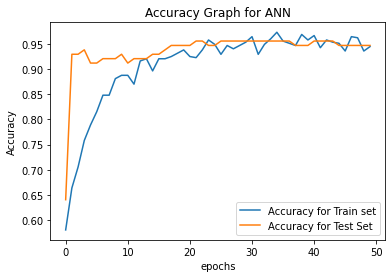

In [97]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

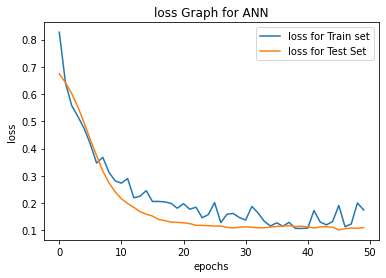

In [98]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [99]:
y_pred_ann_owa = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann_owa)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9473684210526315